In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
x_train=x_train.reshape(60000,784).astype('float32')
x_test=x_test.reshape(10000,784).astype('float32')

In [40]:
x_train/=255
x_test/=255

In [42]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [49]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [50]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [53]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2457 - accuracy: 0.9248 - val_loss: 0.1301 - val_accuracy: 0.9589
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1014 - accuracy: 0.9698 - val_loss: 0.0873 - val_accuracy: 0.9744
Epoch 3/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0744 - accuracy: 0.9780 - val_loss: 0.0785 - val_accuracy: 0.9773
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.0595 - accuracy: 0.9822 - val_loss: 0.0734 - val_accuracy: 0.9783
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0496 - accuracy: 0.9853 - val_loss: 0.0707 - val_accuracy: 0.9812
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0447 - accuracy: 0.9869 - val_loss: 0.0894 - val_accuracy: 0.9777
Epoch 7/20
60000/60000 [==============================] - 6s 98

In [58]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12527820501072662
Test accuracy: 0.9836999773979187


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


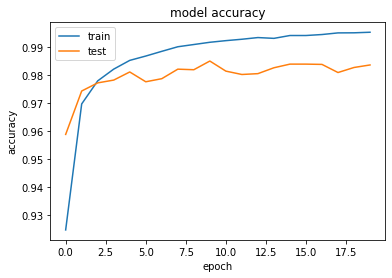

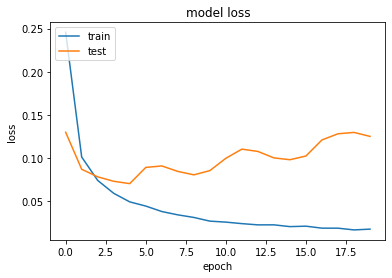

In [64]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()